In [1]:
import pandas as pd

chiBB = pd.read_csv('/home/const/MEGA/Physics/GrabbedFigures/LiuRapp2021/chiBB.csv')

In [157]:
import TMQGP as tm
import QuarkTM

In [3]:
import matplotlib
matplotlib.style.use('publication')
import os

In [4]:
import h5py

In [5]:
from numpy import *

In [6]:
murange = array([0, 0.2, 0.4, 0.6])

In [7]:
folder = '4ch_XHI/'

In [8]:
fnames = ['data.hdf5', 'data_02.hdf5', 'data_04.hdf5', 'data_06.hdf5']

In [9]:
folder2 = '4ch_HI/'

In [10]:
fnames2 = ['0.00/data.hdf5', '0.20/data.hdf5', '0.40/data.hdf5', '0.60/data.hdf5']

In [11]:
dfs = [h5py.File(folder+fname) for fname in fnames] 

In [12]:
dfs2 = [h5py.File(folder2+fname) for fname in fnames2] 

In [13]:
Trange = dfs[0].attrs['Trange']
Tkeys = list(dfs[0].keys())

In [14]:
erange = dfs[0]['170'].attrs['erange']
erange2 = dfs2[0]['170'].attrs['erange']

qrange1 = dfs[0]['170'].attrs['qrange']
qrange2 = dfs2[0]['170'].attrs['qrange']

In [15]:
GG = array(dfs[3]['170']['Q']['G'])

In [16]:
GG2 = array(dfs2[3]['170']['Q']['G'])

[]

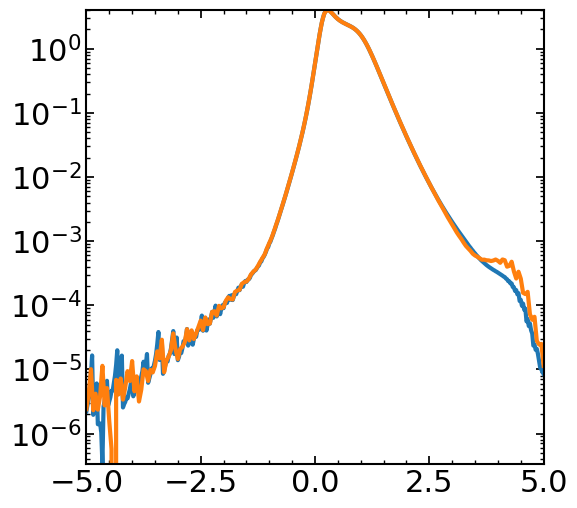

In [17]:
plt.plot(erange, -imag(GG[:,0]))
plt.plot(erange2, -imag(GG2[:,0]))

plt.semilogy()

In [18]:
Ps_mu = []

for df in dfs:
    Ps = []
    for Tkey in Tkeys:
        Ps += [float(df[Tkey].attrs['Ptot'])]
    Ps_mu += [Ps]

Ps_mu = array(Ps_mu)

/tmp/ipykernel_16728/3111885847.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ps += [float(df[Tkey].attrs['Ptot'])]


In [19]:
Ps_mu2 = []

for df in dfs2:
    Ps = []
    for Tkey in Tkeys:
        Ps += [float(df[Tkey].attrs['Ptot'])]
    Ps_mu2 += [Ps]

Ps_mu2 = array(Ps_mu2)

/tmp/ipykernel_16728/2035621139.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ps += [float(df[Tkey].attrs['Ptot'])]


(0.0, 0.25)

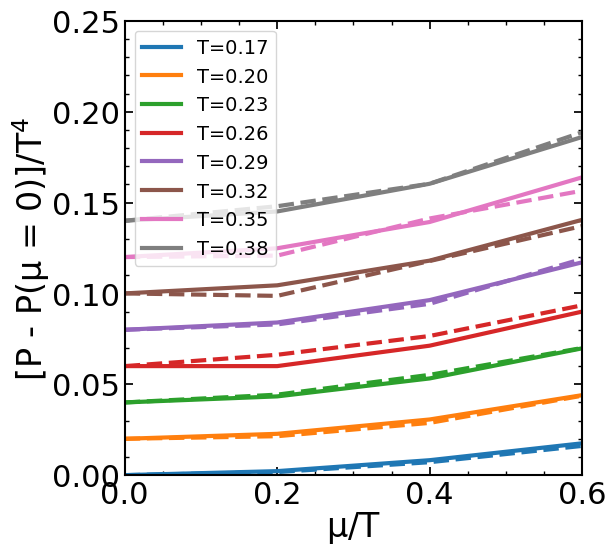

In [20]:
for i in range(8):
    T = Trange[i]
        
    shift = 0.02*i
    l, = plt.plot(murange, shift + (Ps_mu[:, i] - Ps_mu[0, i])/T**4, label='T=%.2f'%(T))
    l2, = plt.plot(murange, shift + (Ps_mu2[:, i] - Ps_mu2[0, i])/T**4, ls='--', c=l.get_c())
    # plt.plot(murange, shift + fit_func(sol.x, murange), ls='--', c=l.get_c())
    
    # chis += [sol.x]
plt.legend(fontsize=14)

plt.xlabel('$\mu/T$')
plt.ylabel('[P - P($\mu$ = 0)]/T$^4$')
# plt.savefig('Pmu_fit.pdf', bbox_inches='tight')

plt.ylim(0, 0.25)

## Compare SFs

In [54]:
i = 0
i_T = 0
i_q2 = 10
i_q1 = 4 * i_q2
T = Trange[i_T]
murange[i], Trange[i_T], qrange1[i_q1], qrange2[i_q2], T

(0.0, 0.170253, 1.0, 1.0, 0.170253)

In [55]:
df1 = dfs[i][Tkeys[i_T]]
df2 = dfs2[i][Tkeys[i_T]]

In [56]:
df2.attrs['T']

0.170253

In [57]:
R1 = df1['Q']['R']
R2 = df2['Q']['R']
S1 = df1['Q']['S']
S2 = df2['Q']['S']

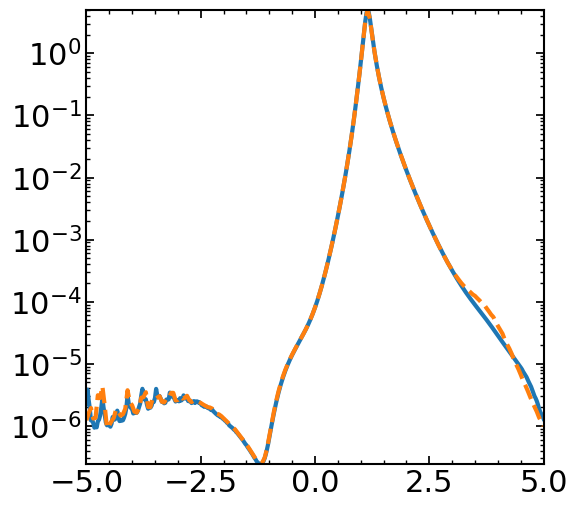

In [58]:
plt.plot(erange, R1[:, i_q1])
plt.semilogy(erange2, R2[:, i_q2], ls='--')

[]

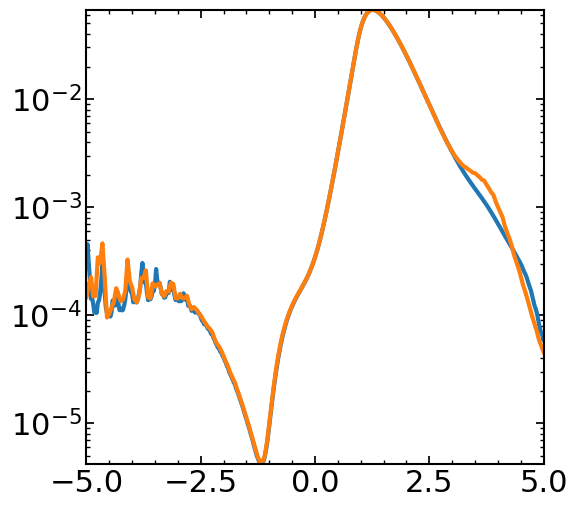

In [59]:
plt.plot(erange, -imag(S1[:, i_q1]))
plt.plot(erange2, -imag(S2[:, i_q2]))
plt.semilogy()

In [60]:
tm1 = df1['TM']['qa1']['0']
tm2 = df2['TM']['qa1']['0']

(0.01, 1000)

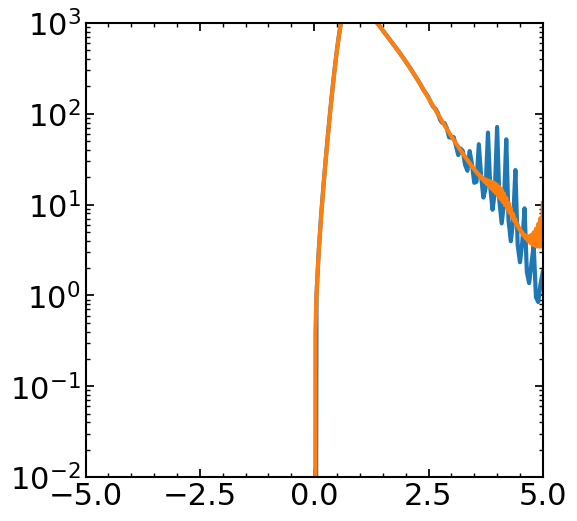

In [61]:
plt.plot(erange2, -imag(tm2[:, 0]))
plt.plot(erange, -imag(tm1[:, 0]))
plt.semilogy()

plt.ylim(0.01, 1000)

## Recalculating $\Sigma$ to check the bump

In [146]:
tm1 = array(df1['TM']['qa1']['0'])
tm2 = array(df2['TM']['qa1']['0'])

tm1[erange < 0] = real(tm1[erange < 0])
tm2[erange2 < 0] = real(tm2[erange2 < 0])

iImTM1 = tm.Interpolator2D(qrange1, erange, ascontiguousarray(imag(tm1)))
iImTM2 = tm.Interpolator2D(qrange2, erange2, ascontiguousarray(imag(tm2)))

In [147]:
mQ = df1.attrs['mQ']

In [148]:
eps1 = sqrt(mQ**2 + qrange1**2)
iEps1 = tm.Interpolator(qrange1, eps1, 'cubic')

eps2 = sqrt(mQ**2 + qrange2**2)
iEps2 = tm.Interpolator(qrange2, eps2, 'cubic')

In [149]:
iR1 = tm.Interpolator2D(qrange1, erange, ascontiguousarray(imag(-1/pi*array(df1['Q']['G']))))
iR2 = tm.Interpolator2D(qrange2, erange2, ascontiguousarray(imag(-1/pi*array(df2['Q']['G']))))

In [150]:
s1 = array([tm.sigma_ff_onshell(e, 0, T, iImTM1, iR1, iEps1, iEps1) for e in erange])

In [151]:
s2 = array([tm.sigma_ff_onshell(e, 0, T, iImTM2, iR2, iEps2, iEps2) for e in erange])

In [152]:
# Take iEps from XHI calculation
s2_2 = array([tm.sigma_ff_onshell(e, 0, T, iImTM2, iR2, iEps1, iEps1) for e in erange])

# nothing changed

In [153]:
# Take R from XHI calculation
s2_3 = array([tm.sigma_ff_onshell(e, 0, T, iImTM2, iR1, iEps1, iEps1) for e in erange])

# nothing changed

In [154]:
# Take TM from XHI calculation
s2_4 = array([tm.sigma_ff_onshell(e, 0, T, iImTM1, iR2, iEps2, iEps2) for e in erange])

# nothing changed

[]

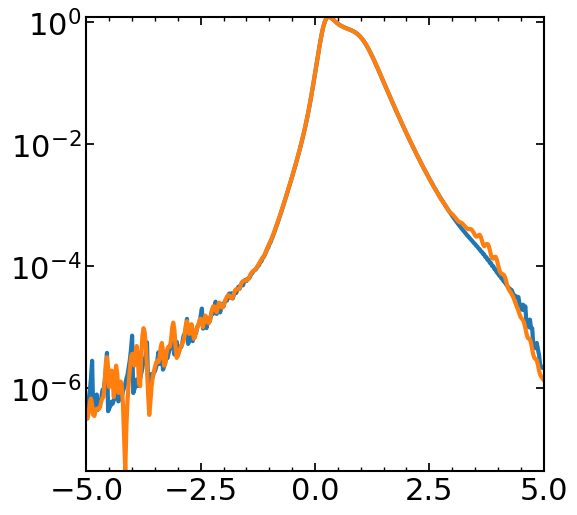

In [155]:
plt.plot(erange, [iR1(0, e) for e in erange])
plt.plot(erange, [iR2(0, e) for e in erange])

plt.semilogy()

[]

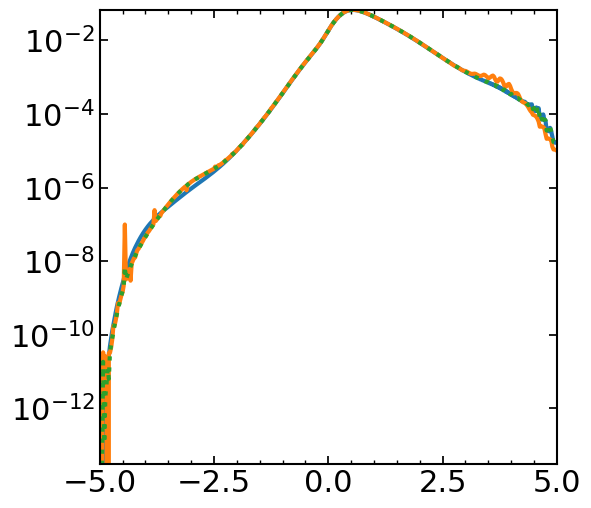

In [156]:
plt.plot(erange, -s1)
plt.plot(erange, -s2)
# plt.plot(erange, -s2_2)
# plt.plot(erange, -s2_3, ls='--')
plt.plot(erange, -s2_4, ls=':')
plt.semilogy()

## Reproduce the T-matrix in two resolutions

In [160]:
pt1 = QuarkTM.Particle(mQ, qrange1, erange, Gtab=df1['Q']['G'])
pt2 = QuarkTM.Particle(mQ, qrange2, erange2, Gtab=df2['Q']['G'])

In [168]:
ch1 = QuarkTM.Channel(pt1, pt1, T, G=df1.attrs['G'], L=df1.attrs['L'], screen=df1.attrs['screen'])
ch2 = QuarkTM.Channel(pt2, pt2, T, G=df2.attrs['G'], L=df1.attrs['L'], screen=df1.attrs['screen'])

In [169]:
ch1.populate_T_fast()
ch2.populate_T_fast()

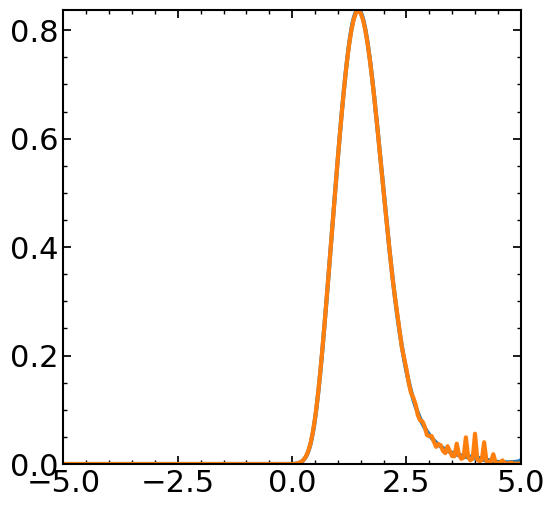

In [173]:
plt.plot(erange, imag(ch1.XS[0][:, 0]))
plt.plot(erange2, imag(ch2.XS[0][:, 0]))

In [215]:
e_plot = 2.5
i2 = argmin(abs(erange2 - e_plot))
i1 = argmin(abs(erange - e_plot))
i1, i2

(300, 150)

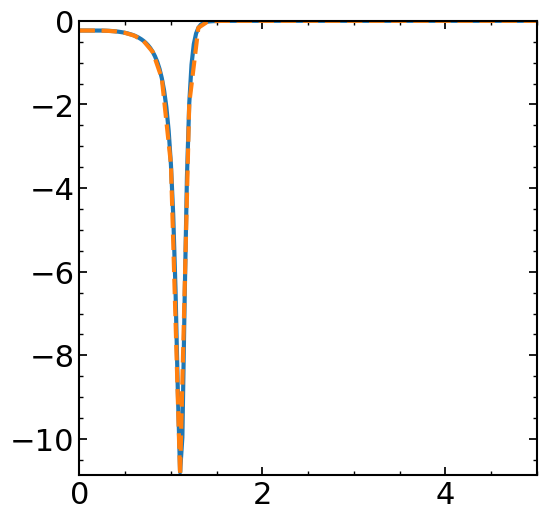

In [216]:
plt.plot(qrange1, imag(ch1.G2[i1, :]))
plt.plot(qrange2, imag(ch2.G2[i2, :]), ls='--')

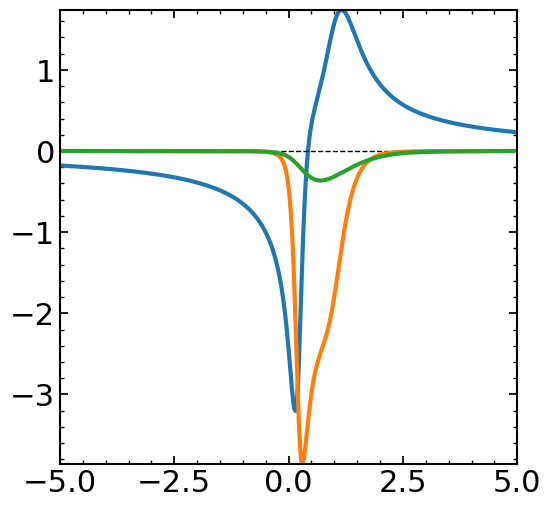

In [226]:
plt.plot(erange, real(df1['Q']['G'])[:, 0])
plt.axhline(0, ls='--', lw=1, c='black')
plt.plot(erange, imag(df1['Q']['G'])[:, 0])
plt.plot(erange, imag(df1['Q']['S'])[:, 0])

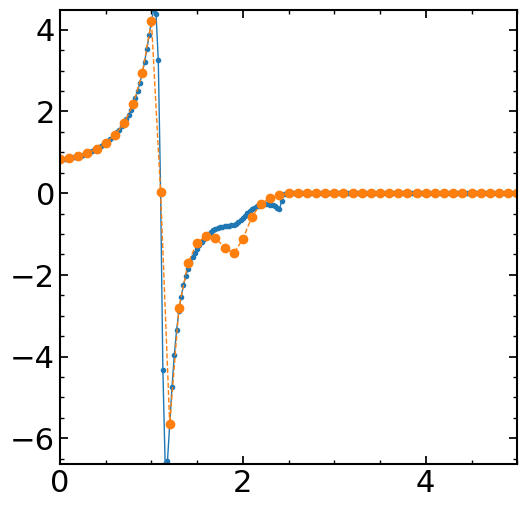

In [217]:
plt.plot(qrange1, real(ch1.G2[i1, :]), marker='.', lw=1)
plt.plot(qrange2, real(ch2.G2[i2, :]), ls='--', marker='o', lw=1)

In [207]:
q_plot = 1.5
iq2 = argmin(abs(qrange2 - q_plot))
iq1 = argmin(abs(qrange1 - q_plot))
iq1, iq2

(60, 15)

[]

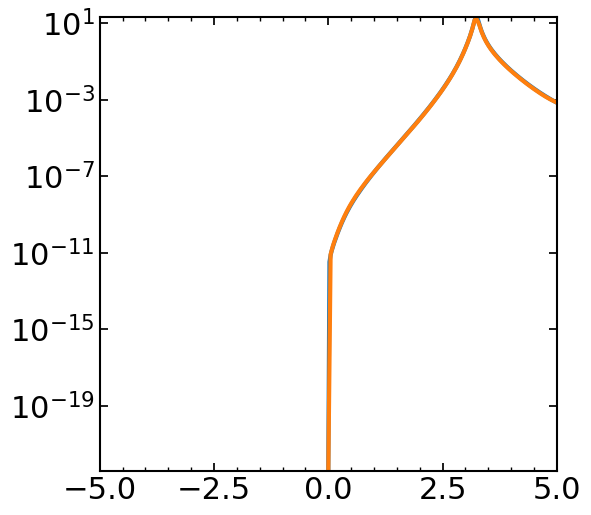

In [208]:
plt.plot(erange, -imag(ch1.G2[:, iq1]))
plt.plot(erange2, -imag(ch2.G2[:, iq2]))

plt.semilogy()

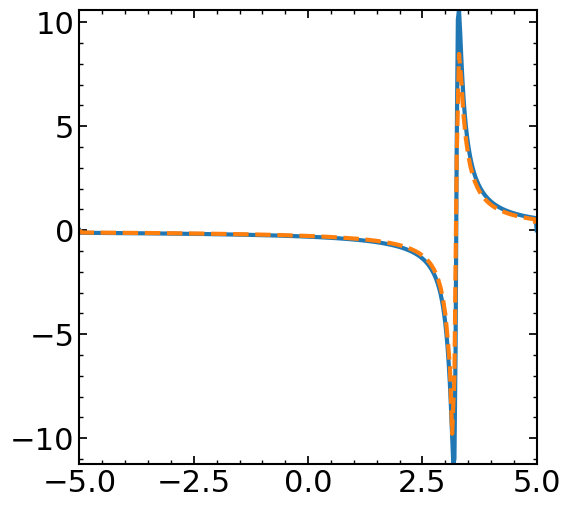

In [209]:
plt.plot(erange, real(ch1.G2[:, iq1]))
plt.plot(erange2, real(ch2.G2[:, iq2]), ls='--')

# plt.semilogy()

## Checking the thermodynamics sensitivity

In [84]:
th1_0 = h5py.File(os.path.join(folder, '%.2f/th_data_single_%s.hdf5'%(0, Tkeys[i_T])))
th2_0 = h5py.File(os.path.join(folder2, '%.2f/th_data_single_%s.hdf5'%(0, Tkeys[i_T])))

In [85]:
th1 = h5py.File(os.path.join(folder, '%.2f/th_data_single_%s.hdf5'%(murange[i], Tkeys[i_T])))
th2 = h5py.File(os.path.join(folder2, '%.2f/th_data_single_%s.hdf5'%(murange[i], Tkeys[i_T])))

In [86]:
T = Trange[i_T]

In [87]:
th1.attrs['Ptot']/T**4, th2.attrs['Ptot']/T**4

(array([0.85146217]), array([0.85285615]))

In [90]:
th1.attrs['Ptot']/T**4 - th2.attrs['Ptot']/T**4

array([-0.00139398])

In [92]:
th1_0.attrs['Ptot']/T**4, th2_0.attrs['Ptot']/T**4

(array([0.85146217]), array([0.85285615]))

In [93]:
th1_0.attrs['Ptot']/T**4 - th2_0.attrs['Ptot']/T**4

array([-0.00139398])

In [94]:
(th1.attrs['Ptot'] - th1_0.attrs['Ptot']) /T**4, (th2.attrs['Ptot']/T**4 - th2_0.attrs['Ptot']/T**4)

(array([0.]), array([0.]))

In [96]:
th1.attrs['P_Q_Q']/T**4, th2.attrs['P_Q_Q']/T**4

(array([1.21481829]), array([1.22281394]))

In [97]:
th1.attrs['P_S_Q']/T**4, th2.attrs['P_S_Q']/T**4

(array([-1.01261834]), array([-1.02200801]))

In [98]:
th1.attrs.keys()

<KeysViewHDF5 ['P_Phi', 'P_Phi_A', 'P_Phi_G', 'P_Phi_Q', 'P_Q_A', 'P_Q_Q', 'P_S_A', 'P_S_Q', 'Ptot']>

In [99]:
(th1.attrs['P_S_Q'] + th1.attrs['P_Q_Q'])/T**4, (th2.attrs['P_S_Q'] + th1.attrs['P_Q_Q'])/T**4

(array([0.20219995]), array([0.19281027]))

In [100]:
(th1.attrs['P_S_A'] + th1.attrs['P_Q_A'])/T**4, (th2.attrs['P_S_A'] + th1.attrs['P_Q_A'])/T**4

(array([0.20219995]), array([0.19281027]))

In [101]:
th1.attrs['P_Phi_Q']/T**4, th2.attrs['P_Phi_Q']/T**4

(array([0.22353114]), array([0.22562215]))

In [102]:
th1.attrs['P_Phi_A']/T**4, th2.attrs['P_Phi_A']/T**4

(array([0.22353114]), array([0.22562215]))

## Recalculate the QP pressure

In [103]:
Nf = 3
Nc = 3
Ns = 2

In [104]:
iImG1 = tm.Interpolator2D(qrange1, erange, ascontiguousarray(array(imag(df1['Q']['G']))))
iReG1 = tm.Interpolator2D(qrange1, erange, ascontiguousarray(array(real(df1['Q']['G']))))

iImG2 = tm.Interpolator2D(qrange2, erange2, ascontiguousarray(array(imag(df2['Q']['G']))))
iReG2 = tm.Interpolator2D(qrange2, erange2, ascontiguousarray(array(real(df2['Q']['G']))))

In [105]:
th1.attrs['P_Q_Q']/T**4

array([1.21481829])

In [106]:
pq1 = tm.OmQ_F(T, iImG1, iReG1)
Nf * Nc * Ns * pq1 / T**4

1.2148182893800823

In [107]:
pq2 = tm.OmQ_F(T, iImG2, iReG2)
Nf * Nc * Ns * pq2 / T**4

1.2228139416013661

In [108]:
iImG1_1 = tm.InterDenom2D(qrange1, erange, ascontiguousarray(real(1/array(df1['Q']['G']))), 
                          ascontiguousarray(imag(1/array(df1['Q']['G']))), 
                         'imag')
iReG1_1 = tm.InterDenom2D(qrange1, erange, ascontiguousarray(real(1/array(df1['Q']['G']))), 
                          ascontiguousarray(imag(1/array(df1['Q']['G']))), 
                         'real')

iImG2_1 = tm.InterDenom2D(qrange2, erange2, ascontiguousarray(real(1/array(df2['Q']['G']))), 
                          ascontiguousarray(imag(1/array(df2['Q']['G']))), 
                         'imag')
iReG2_1 = tm.InterDenom2D(qrange2, erange2, ascontiguousarray(real(1/array(df2['Q']['G']))), 
                          ascontiguousarray(imag(1/array(df2['Q']['G']))), 
                         'real')

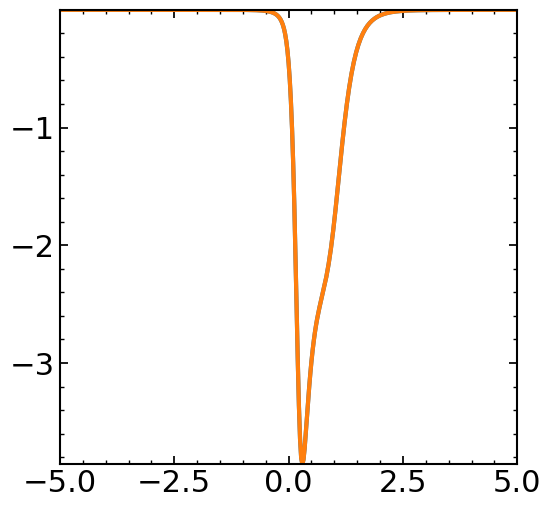

In [109]:
# plt.plot(erange, [iImG1_1(e, 0) for e in erange])
plt.plot(erange, [iImG1(0, e) for e in erange])
plt.plot(erange, [iImG1_1(0, e) for e in erange])
# plt.plot(erange, ascontiguousarray(array(imag(df1['Q']['G'])))[:, 0])

In [110]:
pq1_1 = tm.OmQ_F(T, iImG1_1, iReG1_1)
Nf * Nc * Ns * pq1_1 / T**4

1.2148256928252985

In [111]:
pq2_1 = tm.OmQ_F(T, iImG2_1, iReG2_1)
Nf * Nc * Ns * pq2_1 / T**4

1.2229969750444043

In [112]:
pq1_2 = tm.OmQ_F_adaptive(T, iImG1_1, iReG1_1)
Nf * Nc * Ns * pq1_1 / T**4

1.2148256928252985

## Recalculate the $\Phi$

### Inspect the LogT

In [123]:
th1.keys()

<KeysViewHDF5 ['LogS', 'LogT']>

[]

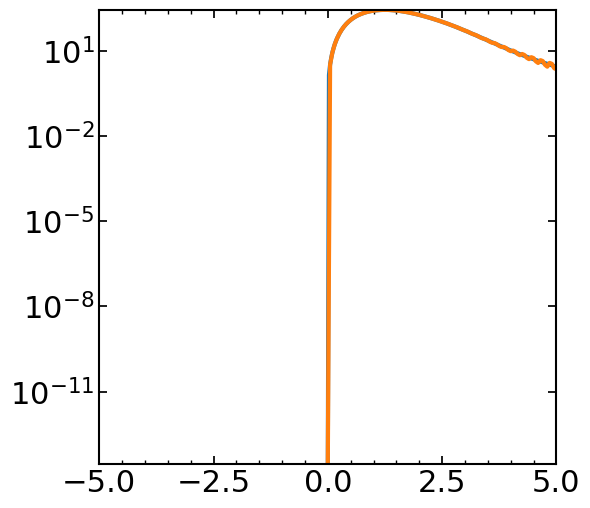

In [128]:
plt.plot(erange, -imag(th1['LogT']['qa1']['0'][:, 0]))
plt.plot(erange2, -imag(th2['LogT']['qa1']['0'][:, 0]))
plt.semilogy()

In [133]:
th1['LogS'].keys()

<KeysViewHDF5 ['AA', 'AQ', 'QA', 'QQ']>

[]

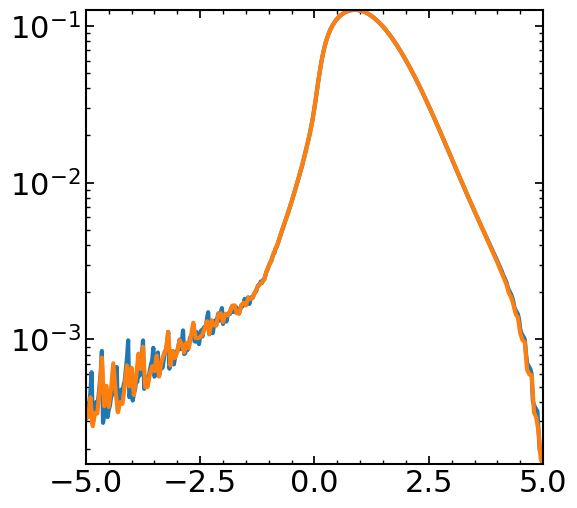

In [134]:
plt.plot(erange, -imag(th1['LogS']['QQ'][:, 0]))
plt.plot(erange2, -imag(th2['LogS']['QQ'][:, 0]))
plt.semilogy()

### Recalculate pressure with one TM

In [83]:
qrange1 = df1.attrs['qrange']
qrange2 = df2.attrs['qrange']

In [84]:
mQ = df1.attrs['mQ']
eps1 = sqrt(mQ**2 + qrange1**2)
eps2 = sqrt(mQ**2 + qrange2**2)

In [ ]:
plt.plot()